<a href="https://colab.research.google.com/github/tq21/ML-Stuff/blob/master/ConvNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip -o /tmp/horse-or-human.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  142M  100  142M    0     0  68.6M      0  0:00:02  0:00:02 --:--:-- 68.6M


In [2]:
!curl https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -o /tmp/validation-horse-or-human.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10.9M  100 10.9M    0     0  14.5M      0 --:--:-- --:--:-- --:--:-- 14.4M


In [3]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [4]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [5]:
train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)

validation_horse_hames = os.listdir(validation_horse_dir)
validation_human_names = os.listdir(validation_human_dir)

train_dir = '/tmp/horse-or-human/'
valid_dir = '/tmp/validation-horse-or-human/'

## Data Preprocessing using ImageDataGenerator:

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# rescale all images
# adding augmentations
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1.0/255.0)

# flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=128,
    class_mode='binary')

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


## Build a Convolutional Neural Network:

In [16]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

In [17]:
DESIRED_ACCURACY = 0.999

# callback function
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > DESIRED_ACCURACY):
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True
            
callbacks = myCallback()

# building model
# input image shape = 150, 150
# binary classification
model = tf.keras.models.Sequential([
    # first conv
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # second conv
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # third conv
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # forth layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # flatten
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # output layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile model
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 128)      

In [20]:
# train model
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=50,
    validation_data=valid_generator,
    validation_steps=8,
    callbacks=[callbacks])

Epoch 1/50
8/8 [==============================] - 9s 1s/step - loss: 0.9452 - accuracy: 0.5083 - val_loss: 0.6861 - val_accuracy: 0.5000
Epoch 2/50
8/8 [==============================] - 10s 1s/step - loss: 0.6844 - accuracy: 0.5806 - val_loss: 0.6608 - val_accuracy: 0.5000
Epoch 3/50
8/8 [==============================] - 8s 1s/step - loss: 0.7646 - accuracy: 0.5328 - val_loss: 0.6669 - val_accuracy: 0.5391
Epoch 4/50
8/8 [==============================] - 8s 1s/step - loss: 0.7080 - accuracy: 0.5996 - val_loss: 1.5538 - val_accuracy: 0.5000
Epoch 5/50
8/8 [==============================] - 9s 1s/step - loss: 0.6770 - accuracy: 0.5951 - val_loss: 1.1096 - val_accuracy: 0.5000
Epoch 6/50
8/8 [==============================] - 10s 1s/step - loss: 0.9064 - accuracy: 0.6641 - val_loss: 7.9820 - val_accuracy: 0.5000
Epoch 7/50
8/8 [==============================] - 9s 1s/step - loss: 0.9676 - accuracy: 0.6730 - val_loss: 0.7393 - val_accuracy: 0.5000
Epoch 8/50
8/8 [=======================

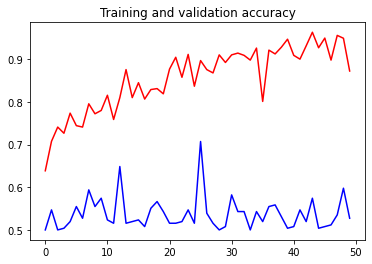

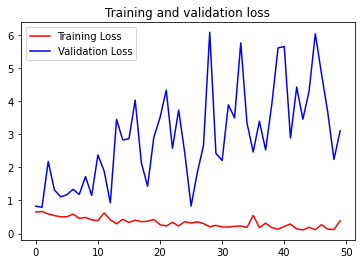

In [14]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# stop kernel
import os, signal
os.kill(os.getpid(), signal.SIGKILL)